# Linear Regression
You should build a machine learning pipeline using a linear regression model. In particular, you should do the following:
- Load the `housing` dataset using [Pandas](https://pandas.pydata.org/docs/reference/api/pandas.read_csv.html). You can find this dataset in the datasets folder.
- Split the dataset into training and test sets using [Scikit-Learn](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html).
- Conduct data exploration, data preprocessing, and feature engineering if necessary.
- Train and test a linear regression model using [Scikit-Learn](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html).
- Check the documentation to identify the most important hyperparameters, attributes, and methods of the model. Use them in practice.

Load Dataset

In [2]:
#Import Library
import pandas as pd
import numpy as np
import sklearn.model_selection

#from sklearn import datasets

In [3]:
df = pd.read_csv('https://raw.githubusercontent.com/m-mahdavi/teaching/refs/heads/main/datasets/housing.csv')

In [4]:
df.head()


,id,price,area,bedrooms,bathrooms,stories,stories.1,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,0,13300000,7420,4,2,3,1,0,0,0,1,2,1,1.0
1,1,12250000,8960,4,4,4,1,0,0,0,1,3,0,1.0
2,2,12250000,9960,3,2,2,1,0,1,0,0,2,1,0.5
3,3,12215000,7500,4,2,2,1,0,1,0,1,3,1,1.0
4,4,11410000,7420,4,1,2,1,1,1,0,1,2,0,1.0


((545, 13), (545,))

In [41]:
#data exploration
df_train.describe()

,id,price,area,bedrooms,bathrooms,stories,stories.1,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
count,408.000000,4.080000e+02,408.000000,408.000000,408.000000,408.000000,408.000000,408.000000,408.000000,408.000000,408.000000,408.000000,408.000000,408.000000
mean,271.877451,4.796363e+06,5172.068627,2.985294,1.306373,1.801471,0.857843,0.178922,0.352941,0.034314,0.308824,0.703431,0.250000,0.466912
std,157.600963,1.959029e+06,2212.347671,0.748318,0.516802,0.879635,0.349640,0.383757,0.478471,0.182257,0.462575,0.865834,0.433544,0.375226
min,0.000000,1.750000e+06,1650.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,139.500000,3.465000e+06,3568.000000,3.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,276.500000,4.305000e+06,4600.000000,3.000000,1.000000,2.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.500000
75%,405.250000,5.740000e+06,6360.000000,3.000000,2.000000,2.000000,1.000000,0.000000,1.000000,0.000000,1.000000,1.000000,0.250000,0.625000
max,544.000000,1.330000e+07,16200.000000,6.000000,4.000000,4.000000,1.000000,1.000000,1.000000,1.000000,1.000000,3.000000,1.000000,1.000000


In [20]:
df_train.isnull()

,id,price,area,bedrooms,bathrooms,stories,stories.1,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
222,False,False,False,False,False,False,False,False,False,False,False,False,False,False
130,False,False,False,False,False,False,False,False,False,False,False,False,False,False
113,False,False,False,False,False,False,False,False,False,False,False,False,False,False
524,False,False,False,False,False,False,False,False,False,False,False,False,False,False
372,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18,False,False,False,False,False,False,False,False,False,False,False,False,False,False
11,False,False,False,False,False,False,False,False,False,False,False,False,False,False
140,False,False,False,False,False,False,False,False,False,False,False,False,False,False
388,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [22]:
df_train.isnull().sum().sum()


0

In [23]:
df_train.dtypes

,0
id,int64
price,int64
area,int64
bedrooms,int64
bathrooms,int64
stories,int64
stories.1,int64
guestroom,int64
basement,int64
hotwaterheating,int64


In [ ]:
# prompt: tell me if data preprocessing, and feature engineering is necessary in given dataset

Yes, data preprocessing and potentially feature engineering are likely necessary based on the provided code and common practices for datasets like this.  Here's why:

1. **Missing Values:** The code checks for missing values using `df_train.isnull().sum()`. If any missing values exist (and it's highly probable in real-world data), they'll need to be handled. Common techniques include imputation (filling with mean, median, or a more sophisticated method) or removal of rows/columns with too many missing values.

2. **Data Distributions:** The code visualizes data distributions using histograms (`df_train.hist()`). Skewed distributions might indicate the need for transformations like log transformation or Box-Cox transformation to improve model performance.  Outliers, visible in histograms or scatterplots, might also need addressing (e.g., winsorizing, removing, or transforming).

3. **Feature Relationships and Correlations:**  The code explores correlations between features and the target variable (`median_house_value`) using scatter plots and a correlation matrix.  Features that are highly correlated with each other (multicollinearity) may need to be handled (e.g., removing one of the correlated features or using dimensionality reduction techniques like PCA).  Weakly correlated features might not be informative and could be removed.

4. **Feature Engineering:** Based on domain expertise or insights gained from EDA, new features could improve the model.  For example, combining existing features (e.g., creating a "rooms per household" feature from "total_rooms" and "households") or creating interaction terms might capture non-linear relationships.

5. **Data Types:**  The code checks data types with `df_train.dtypes`.  Categorical features (if any) likely need to be converted into numerical representations (one-hot encoding or label encoding) before being used in a linear regression model.


In summary, the exploratory data analysis (EDA) steps in the code provide the basis for determining the necessary preprocessing and feature engineering.  The presence of missing values, skewed distributions, correlated features, and categorical variables strongly suggests these steps are crucial for building a robust and accurate linear regression model.


array([[<Axes: title={'center': 'id'}>,
        <Axes: title={'center': 'price'}>,
        <Axes: title={'center': 'area'}>,
        <Axes: title={'center': 'bedrooms'}>],
       [<Axes: title={'center': 'bathrooms'}>,
        <Axes: title={'center': 'stories'}>,
        <Axes: title={'center': 'stories.1'}>,
        <Axes: title={'center': 'guestroom'}>],
       [<Axes: title={'center': 'basement'}>,
        <Axes: title={'center': 'hotwaterheating'}>,
        <Axes: title={'center': 'airconditioning'}>,
        <Axes: title={'center': 'parking'}>],
       [<Axes: title={'center': 'prefarea'}>,
        <Axes: title={'center': 'furnishingstatus'}>, <Axes: >, <Axes: >]],
      dtype=object)

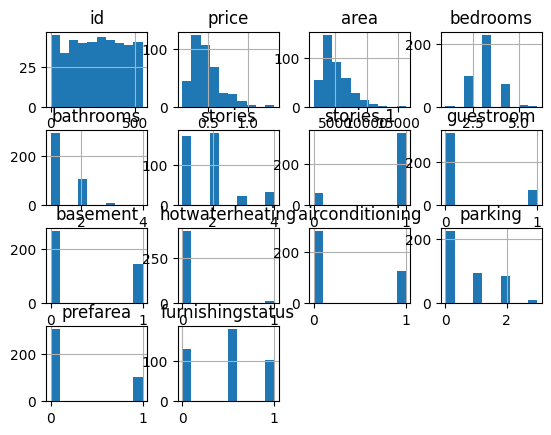

In [25]:
#how to read from the hist or scatter plot that preproccesing and transformatios are needed?
df_train.hist()

Create X and Y Matrices

In [9]:
# prompt: create X and Y matrices and load data into it

# Create X and Y Matrices
X = df.drop('price', axis=1)
Y = df['price']
X.shape, Y.shape

((545, 13), (545,))

Perform 80/20 Data Split

In [10]:
# Dividing train and test data
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2)

#Data Dimension
print("X_train Shape : ", X_train.shape)
print("X_test Shape : ", X_test.shape)
print("Y_train Shape : ", Y_train.shape)
print("Y_test Shape : ", Y_test.shape)



#df_train, df_test = sklearn.model_selection.train_test_split(df)
#print ("df_train shape = ", df_train.shape)
#print ("df_test.shape = " , df_test.shape)
#X_train = df_train.drop("price", axis='columns')
#y_train = df_train.price
#X_test = df_test.drop("price", axis='columns')
#y_test = df_test.price


X_train Shape :  (436, 13)
X_test Shape :  (109, 13)
Y_train Shape :  (436,)
Y_test Shape :  (109,)


**Linear Regression Model**

In [15]:
#Import Library
import sklearn.linear_model
from sklearn.linear_model import LinearRegression
import sklearn.metrics
#from sklearn.metrics import mean_sqaured_error, r2_score


#####**Build linear regression**

#####Defines the regression model

In [17]:

#model = linear_model.LinearRegression()
model = LinearRegression()

#####Build training model


In [20]:
model.fit(X_train,Y_train)

LinearRegression()

#####Apply trained model to make prediction(on test set)

In [21]:
Y_pred = model.predict(X_test)

In [23]:
Y_pred

array([2426086.62510695, 5644631.96936727, 3730400.23841546,
       7519485.7149305 , 6513449.44915159, 2562690.55557647,
       5430184.85822742, 6543289.44967295, 5482042.96165053,
       6153021.79357312, 3330297.15336215, 4369072.14423525,
       2299439.6808607 , 7196116.34319538, 5993906.46577357,
       7597877.71132506, 2149359.68237201, 3000179.57671359,
       4559666.11287109, 2103647.91723407, 3943315.17000085,
       3679405.14722842, 5990791.60768701, 6167624.94932144,
       5038019.40899635, 4339994.92801477, 7750029.47568149,
       2880637.4644233 , 2816923.54154984, 6970601.31724901,
       4863030.07096436, 6635690.69654365, 2484568.92980159,
       2115615.25969034, 3853871.6888679 , 3017383.68648248,
       7592400.90109426, 6116162.75358356, 6531040.94558427,
       2323483.06845644, 4799494.40893177, 2207820.33012972,
       4385531.22131148, 4598921.24144335, 7303203.48211415,
       2165502.14999547, 5241533.24468125, 7660874.1705179 ,
       3440156.62391236,

####**Prediction Results**

#####Print model performance

In [24]:
print('Coefficients: ', model.coef_)
print('Intercept: ', model.intercept_)
print('Mean squared error( MSE): %.2f ', sklearn.metrics.mean_squared_error(Y_test, Y_pred))
print("Coefficient of determination (R2score) : %.2f ", sklearn.metrics.r2_score(Y_test, Y_pred))

Coefficients:  [-9.50766691e+03  3.04046537e+01  5.66095497e+03  3.31057202e+05
  8.99749668e+04 -5.77801494e+04 -2.54239379e+04 -5.39089142e+04
  9.31039574e+04  2.11986123e+05  1.60090637e+05  1.70952069e+05
 -1.42584778e+04]
Intercept:  6438944.945452569
Mean squared error( MSE): %.2f  446128428870.77167
Coefficient of determination (R2score) : %.2f  0.8818175640786516


In [26]:

model.score(X_test,Y_test)

0.8818175640786516

In [27]:
#rounding off to 2 digits
'%.2f' %  0.8818175640786516

'0.88'

**Scatter Plots**

Import Library

In [28]:
import seaborn as sns
#import matplotlib.pyplot as plt

In [29]:
#The data
Y_test.head()

,price
463,3080000
181,5215000
349,3780000
33,8190000
74,6650000


In [30]:
import numpy as np
np.array(Y_test)

array([ 3080000,  5215000,  3780000,  8190000,  6650000,  3010000,
        5243000,  5950000,  4550000,  5250000,  3605000,  4095000,
        2660000,  6930000,  5810000,  7350000,  2450000,  3423000,
        4200000,  2450000,  3640000,  3745000,  5460000,  5250000,
        5033000,  4270000,  7700000,  3010000,  3255000,  6510000,
        4620000,  6160000,  2730000,  2520000,  3990000,  3332000,
        7840000,  4970000,  5775000,  2730000,  4277000,  2660000,
        4025000,  4193000,  6440000,  2485000,  4767000,  7245000,
        3500000,  4830000,  9681000,  3780000,  2940000,  6020000,
        6125000,  2870000,  6650000,  7420000,  4270000,  4200000,
        2940000, 10150000,  4760000,  6510000,  3290000,  3885000,
        4893000,  2800000,  8295000,  3850000,  4473000,  2835000,
        3360000,  4060000,  3500000,  6265000,  3255000,  4305000,
        6020000,  3535000, 12250000,  6300000,  2653000,  2653000,
        2380000,  5250000,  2233000,  5565000,  5250000,  3500

In [31]:
Y_pred

array([2426086.62510695, 5644631.96936727, 3730400.23841546,
       7519485.7149305 , 6513449.44915159, 2562690.55557647,
       5430184.85822742, 6543289.44967295, 5482042.96165053,
       6153021.79357312, 3330297.15336215, 4369072.14423525,
       2299439.6808607 , 7196116.34319538, 5993906.46577357,
       7597877.71132506, 2149359.68237201, 3000179.57671359,
       4559666.11287109, 2103647.91723407, 3943315.17000085,
       3679405.14722842, 5990791.60768701, 6167624.94932144,
       5038019.40899635, 4339994.92801477, 7750029.47568149,
       2880637.4644233 , 2816923.54154984, 6970601.31724901,
       4863030.07096436, 6635690.69654365, 2484568.92980159,
       2115615.25969034, 3853871.6888679 , 3017383.68648248,
       7592400.90109426, 6116162.75358356, 6531040.94558427,
       2323483.06845644, 4799494.40893177, 2207820.33012972,
       4385531.22131148, 4598921.24144335, 7303203.48211415,
       2165502.14999547, 5241533.24468125, 7660874.1705179 ,
       3440156.62391236,

<Axes: xlabel='price'>

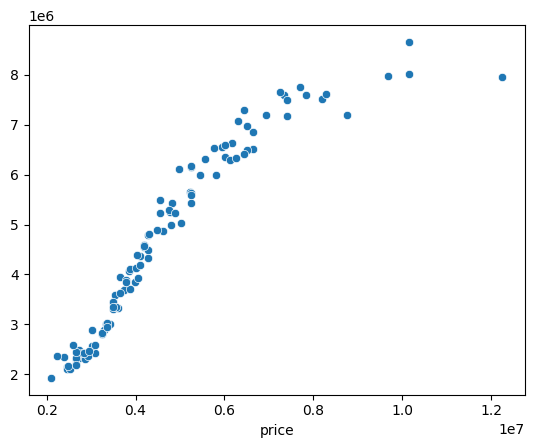

In [41]:
#Ploting
sns.scatterplot(x=Y_test, y=Y_pred)

<Axes: xlabel='price'>

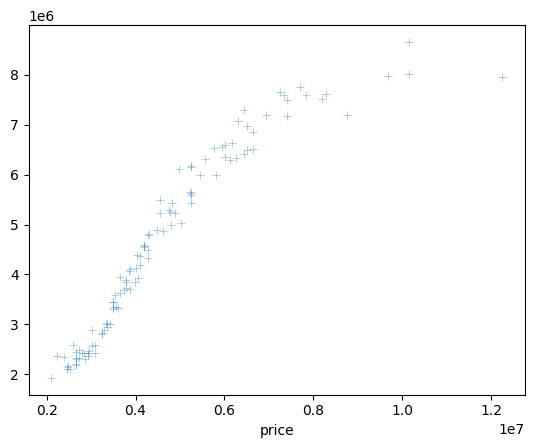

In [43]:
sns.scatterplot(x=Y_test,y= Y_pred, alpha=0.5, marker='+' )
#alpha value makes the poinnt more translucent

In [49]:
from matplotlib import pyplot as plt

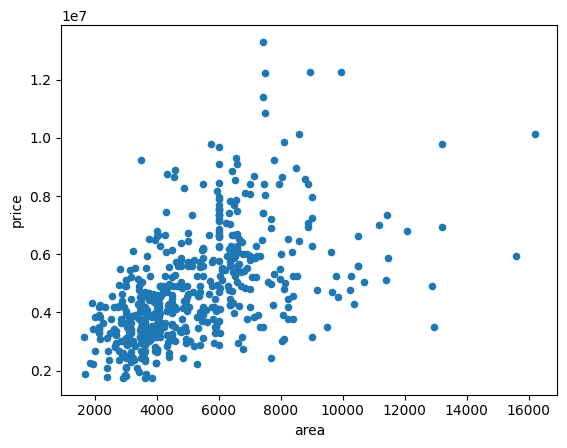

In [51]:
df.plot(kind='scatter', x='area', y='price')
plt.show()

ValueError: x and y must be the same size

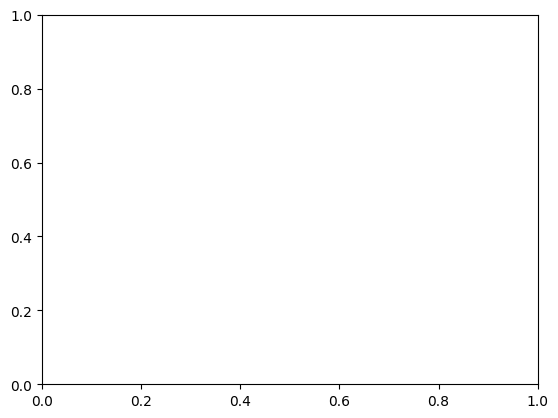

In [56]:
#test train data visualization
plt.scatter(X_train.values.reshape(-1,1),Y_train, label="Train Data", color='b',alpha=.7)
plt.scatter(X_test,Y_test, label="Test Data", color='r',alpha=.7)
plt.title("Train Test Data Visualization")
plt.xlabel("Data")
plt.ylabel("Target")
plt.legend()
plt.show()



ValueError: x and y must be the same size

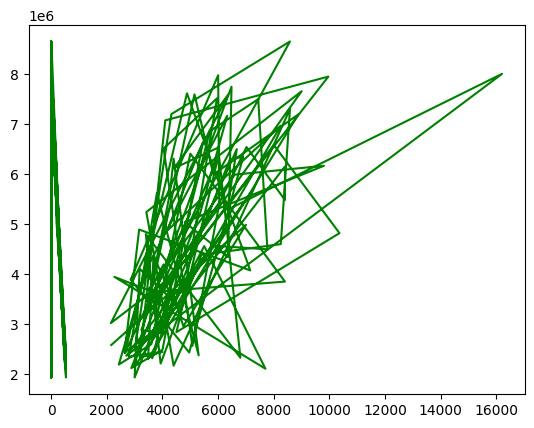

In [48]:

#plot prediction line against actual test data
plt.plot(X_test, Y_pred,label="Linear regression", color='g')
plt.scatter(X_test,Y_test, label="Actual Test Data", color='b',alpha=.7)
plt.legend()
plt.show()